# Exploratory Data Analysis

This notebook will be dedicated to performing some exploratory data analysis on the data.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scipy.stats import chi2_contingency
import nltk
from nltk.corpus import stopwords

%matplotlib inline

In [2]:
# Getting the data files
DATA_PATH = 'data/'
raw_train = pd.read_csv(DATA_PATH+'train.csv')
test = pd.read_csv(DATA_PATH+'test.csv')
sample_submission = pd.read_csv(DATA_PATH+'sample_submission.csv')

In [3]:
# Taking a look at what the sample submission looks like 
# so I know what to submit
sample_submission.head(15)

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
5,12,0
6,21,0
7,22,0
8,27,0
9,29,0


In [4]:
# Checking out the test data
test.head(15)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [5]:
# Seeing test data size
test.shape

(3263, 4)

## Training Data
Working with the training data 

In [6]:
# Checking data dimensions
raw_train.shape

(7613, 5)

In [7]:
raw_train.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [8]:
raw_train.head(15)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


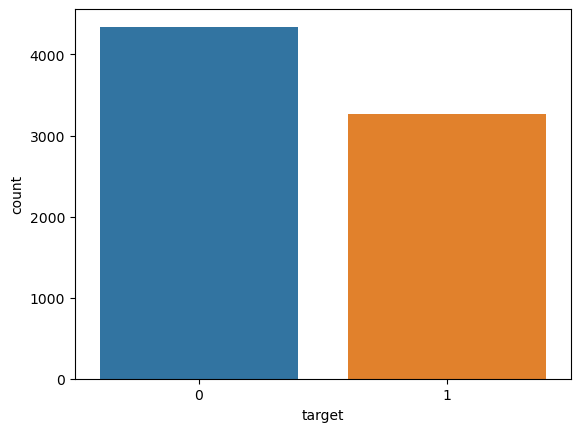

In [9]:
# Checking the distribution of the target
sns.countplot(raw_train,x='target')
plt.show()

In [10]:
# Checking the counts of the targets
raw_train['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [11]:
# Checking if id is unique
len(pd.unique(raw_train['id']))

7613

In [12]:
# Checking the missing values for each column
missing_percent_dict = {}

for column in raw_train.columns:
    missing_percent_dict[column] = sum(pd.isna(raw_train[column])) / raw_train.shape[0] * 100

missing_percent_dict

{'id': 0.0,
 'keyword': 0.8012610009194797,
 'location': 33.27203467752528,
 'text': 0.0,
 'target': 0.0}

In [13]:
# Looking at the keyword breakdown
len(pd.unique(raw_train['keyword']))

222

In [14]:
# Looking at the location breakdown
len(pd.unique(raw_train['location']))

3342

In [15]:
# Looking at the text breakdown
len(pd.unique(raw_train['text']))

7503

### Keyword feature

Does a certain keyword indicate a disaster? 

I hypothesize no since you need context and can't tell if something is a disaster based on a single keyword.

In [16]:
# Looking at what some of these keywords are
raw_train['keyword'].value_counts()

keyword
fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 221, dtype: int64

In [17]:
# Is there a certain keyword that indicated disaster? 
# Can check this by seeing what percentage of the keyword is used in a disaster context
keyword_counts_total = dict(raw_train['keyword'].value_counts())
keyword_count_zero = dict(raw_train.loc[raw_train['target'] == 0, 'keyword'].value_counts())
keyword_count_one = dict(raw_train.loc[raw_train['target'] == 1, 'keyword'].value_counts())

# Getting the percentages for every keyword and writing them to the file
with open('keyword-dist.txt','w') as file:
    for keyword in keyword_counts_total.keys():
        file.write(f'Keyword: {keyword}\n')
        
        if keyword in keyword_count_zero.keys():
            file.write(f'0: {keyword_count_zero[keyword] / keyword_counts_total[keyword] * 100}\n')
        else:
            file.write('0: 0\n')

        if keyword in keyword_count_one.keys():
            file.write(f'1: {keyword_count_one[keyword] / keyword_counts_total[keyword] * 100}\n')
        else:
            file.write('1: 0\n')
        
        file.write(f'Total Count: {keyword_counts_total[keyword]}\n')
        file.write('\n')

File indicates that keywords do matter as certain words have a higher probability of indicating a tweet is about a disaster. For example, P(Disaster | Keyword = derailment) = 1 in 39 examples. Keywords need to be integrated into the model somehow. Maybe weighting the embeddings? 

In [18]:
# Based on the text, Keyword is related to Disaster Prediction
# Can verify the dependency based on Chi-Square Test of Independence

"""
Chi-Square Test of Independence for Keyword and Disaster

Null Hypothesis: Disaster is not associated with Keyword.
Alternative Hypothesis: Disaster is associated with Keyword.

Significance Level (alpha) = 0.05
"""
# Building the contigency table
contingency_table = raw_train[['keyword','target']]
contingency_table['keyword'].fillna('None',inplace=True)
contingency_table = contingency_table.join(pd.get_dummies(contingency_table['target']),how='left')
contingency_table.rename(mapper={0:'No',1:'Yes'},axis=1,inplace=True)
contingency_table.drop(['target'],axis=1,inplace=True)
contingency_table = contingency_table.groupby(by='keyword',axis=0).sum()
contingency_table['Total'] = contingency_table['No'] + contingency_table['Yes']
contingency_table = contingency_table.reset_index()
total_row = {'keyword':'Total','No':contingency_table['No'].sum(),'Yes':contingency_table['Yes'].sum(),'Total':contingency_table['Total'].sum()}
total_row = pd.DataFrame(total_row,index=[0])
contingency_table = pd.concat([contingency_table,total_row])
contingency_table = contingency_table.reset_index(drop=True)
contingency_table.set_index('keyword',drop=True,inplace=True)
contingency_table # Built the contingency table for our observations

/var/folders/c2/rj_bxtsn77q_zsvrmg969nbc0000gn/T/ipykernel_17011/2305526956.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contingency_table['keyword'].fillna('None',inplace=True)


,No,Yes,Total
keyword,,,
None,19,42,61
ablaze,23,13,36
accident,11,24,35
aftershock,34,0,34
airplane%20accident,5,30,35
...,...,...,...
wounds,23,10,33
wreck,30,7,37
wreckage,0,39,39


In [19]:
# Calculating the Chi Square Statistic and P-Value
contingency_table.drop(contingency_table.tail(1).index,inplace=True) # Dropping the total row
res = chi2_contingency(contingency_table,correction=False)
print(f'Chi Statistic: {res.statistic}')
print(f'P-Value: {res.pvalue}')

Chi Statistic: 2282.777332726426
P-Value: 4.685885720020418e-245


Test Results:

When comparing Keyword and Target, we got a p-value of roughly 0 from our Chi-Square Test of Independence. Since 0 < 0.05, we have enough statistical evidence to reject the null hypothesis.

Null Hypothesis: Disaster is not associated with Keyword.
Alternative Hypothesis: Disaster is associated with Keyword.

Hence, we have evidence to support the alternative hypothesis: Disaster is associated with Keyword.

### Does Location Determine Disaster?

Are location and disaster independent?

In [20]:
# Examining location and seeing what the options are
raw_train['location'].value_counts()

location
USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: count, Length: 3341, dtype: int64

In [21]:
# Is P(Disaster | Location) = P(Disaster)? Does the location increase or decrease the chances of disaster?
# I hypothesize no since disasters occur everywhere. However, some locations do tend to be more prone to disasters than others (f.e, the Midwest gets more tornadoes than the rest of the
# U.S)
location_counts_total = dict(raw_train['location'].value_counts())
location_count_zero = dict(raw_train.loc[raw_train['target'] == 0, 'location'].value_counts())
location_count_one = dict(raw_train.loc[raw_train['target'] == 1, 'location'].value_counts())

# Getting the percentages for every location and writing them to the file
with open('location-dist.txt','w') as file:
    for location in location_counts_total.keys():
        file.write(f'Location: {location}\n')
        
        if location in location_count_zero.keys():
            file.write(f'0: {location_count_zero[location] / location_counts_total[location] * 100}\n')
        else:
            file.write('0: 0\n')

        if location in location_count_one.keys():
            file.write(f'1: {location_count_one[location] / location_counts_total[location] * 100}\n')
        else:
            file.write('1: 0\n')
        
        file.write(f'Total Count: {location_counts_total[location]}\n')
        file.write('\n')

In [22]:
# File doesn't provide any substantial evidence on location impacting disaster prediction.
# Running Chi Square Test of Independence
"""
Chi-Square Test of Independence for Keyword and Disaster

Null Hypothesis: Disaster is not associated with location.
Alternative Hypothesis: Disaster is associated with location.

Significance Level (alpha) = 0.05
"""
# Building the contigency table
contingency_table = raw_train[['location','target']]
contingency_table['location'].fillna('None',inplace=True)
contingency_table = contingency_table.join(pd.get_dummies(contingency_table['target']),how='left')
contingency_table.rename(mapper={0:'No',1:'Yes'},axis=1,inplace=True)
contingency_table.drop(['target'],axis=1,inplace=True)
contingency_table = contingency_table.groupby(by='location',axis=0).sum()
contingency_table['Total'] = contingency_table['No'] + contingency_table['Yes']
contingency_table = contingency_table.reset_index()
total_row = {'location':'Total','No':contingency_table['No'].sum(),'Yes':contingency_table['Yes'].sum(),'Total':contingency_table['Total'].sum()}
total_row = pd.DataFrame(total_row,index=[0])
contingency_table = pd.concat([contingency_table,total_row])
contingency_table = contingency_table.reset_index(drop=True)
contingency_table.set_index('location',drop=True,inplace=True) # Got the observations
contingency_table

/var/folders/c2/rj_bxtsn77q_zsvrmg969nbc0000gn/T/ipykernel_17011/2956607919.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contingency_table['location'].fillna('None',inplace=True)


,No,Yes,Total
location,,,
,0,1,1
Glasgow,1,0,1
"Melbourne, Australia",1,0,1
News,0,1,1
å_,1,0,1
...,...,...,...
å_å_Los Mina Cityã¢,1,0,1
å¡å¡Midwest Û¢Û¢,1,0,1
åÊ(?Û¢`?Û¢å«)??,1,0,1


In [23]:
# Calculating the chi-square statistic
contingency_table.drop(contingency_table.tail(1).index,inplace=True) # Dropping the total row
res = chi2_contingency(contingency_table,correction=False)
print(f'Chi Statistic: {res.statistic}')
print(f'P-Value: {res.pvalue}')

Chi Statistic: 3530.215810999556
P-Value: 1.0


Since our p-value from the Chi-Square test is 1.0, we fail to reject the null hypothesis. Hence, we don't have enough evidence to suggest that location and target are independent of 1 another. 

Final Analysis:

Location has a lot of categories (3341) to be exact and many of them are corrupt. Furthermore, many of the location categories aren't even locations (what is Taylor Swift??). Adding on, around 33% of location is missing. Finally, the Chi-Square test shows that we can't clearly determine if location relates to target or not. We can't concretely reject the fact that location and target are independent. 

Hence, dropping the location feature makes a lot of sense.

### Analyzing the Text

Now that I analyzed location and keyword, I need to analyze the actual text, the content of the tweet.

In [24]:
# Creating a new dataframe for purely analyzing the text
text = raw_train['text']
text.head(15)

0     Our Deeds are the Reason of this #earthquake M...
1                Forest fire near La Ronge Sask. Canada
2     All residents asked to 'shelter in place' are ...
3     13,000 people receive #wildfires evacuation or...
4     Just got sent this photo from Ruby #Alaska as ...
5     #RockyFire Update => California Hwy. 20 closed...
6     #flood #disaster Heavy rain causes flash flood...
7     I'm on top of the hill and I can see a fire in...
8     There's an emergency evacuation happening now ...
9     I'm afraid that the tornado is coming to our a...
10          Three people died from the heat wave so far
11    Haha South Tampa is getting flooded hah- WAIT ...
12    #raining #flooding #Florida #TampaBay #Tampa 1...
13              #Flood in Bago Myanmar #We arrived Bago
14    Damage to school bus on 80 in multi car crash ...
Name: text, dtype: object

In [25]:
text.tail(15)

7598    Father-of-three Lost Control of Car After Over...
7599    1.3 #Earthquake in 9Km Ssw Of Anza California ...
7600    Evacuation order lifted for town of Roosevelt:...
7601    #breaking #LA Refugio oil spill may have been ...
7602    a siren just went off and it wasn't the Forney...
7603    Officials say a quarantine is in place at an A...
7604    #WorldNews Fallen powerlines on G:link tram: U...
7605    on the flip side I'm at Walmart and there is a...
7606    Suicide bomber kills 15 in Saudi security site...
7607    #stormchase Violent Record Breaking EF-5 El Re...
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, dtype: object

In [26]:
# Converting the series into a list of sentences for easier manipulation
text_arr = text.to_numpy()
text_arr

array(['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
       'Forest fire near La Ronge Sask. Canada',
       "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
       ...,
       'M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ',
       'Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.',
       'The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d'],
      dtype=object)

In [27]:
# Iterating through each sentence and split by space
# Will help me see each word for our vocabulary
text_arr_split = []

for sentence in text_arr:
    # Replacing \n and \t with spaces
    sentence_processed = sentence.replace("\n"," ")
    sentence_processed = sentence_processed.replace("\t"," ")
    sentence_processed = sentence_processed.replace("\x89"," ")
    text_arr_split.append(sentence_processed.split(" "))

text_arr_split

[['Our',
  'Deeds',
  'are',
  'the',
  'Reason',
  'of',
  'this',
  '#earthquake',
  'May',
  'ALLAH',
  'Forgive',
  'us',
  'all'],
 ['Forest', 'fire', 'near', 'La', 'Ronge', 'Sask.', 'Canada'],
 ['All',
  'residents',
  'asked',
  'to',
  "'shelter",
  'in',
  "place'",
  'are',
  'being',
  'notified',
  'by',
  'officers.',
  'No',
  'other',
  'evacuation',
  'or',
  'shelter',
  'in',
  'place',
  'orders',
  'are',
  'expected'],
 ['13,000',
  'people',
  'receive',
  '#wildfires',
  'evacuation',
  'orders',
  'in',
  'California',
  ''],
 ['Just',
  'got',
  'sent',
  'this',
  'photo',
  'from',
  'Ruby',
  '#Alaska',
  'as',
  'smoke',
  'from',
  '#wildfires',
  'pours',
  'into',
  'a',
  'school',
  ''],
 ['#RockyFire',
  'Update',
  '=>',
  'California',
  'Hwy.',
  '20',
  'closed',
  'in',
  'both',
  'directions',
  'due',
  'to',
  'Lake',
  'County',
  'fire',
  '-',
  '#CAfire',
  '#wildfires'],
 ['#flood',
  '#disaster',
  'Heavy',
  'rain',
  'causes',
  'flas

In [28]:
# Checking what the common words are
word_count = {} # A dictionary to hold the count of every word, a pre-vocabulary

for sentence in text_arr_split:
    for word in sentence:
        # Stripping the hashtag from the beginning of a word
        processed_word = word.replace("&gt","")
        processed_word = processed_word.replace("&lt","")
        processed_word = processed_word.strip("#-'.;:)([]!?|/*@ ")
        processed_word = processed_word.lower()
        # processed_word = processed_word.replace("\x89û_","")
        
        if processed_word in word_count.keys():
            temp = word_count[processed_word] + 1
            word_count[processed_word] = temp
        elif processed_word != "" and processed_word != "&amp":
            word_count[processed_word] = 1

In [29]:
# Checking the number of keys
len(word_count.keys())

22720

In [30]:
# Removing the stop words
nltk.download('stopwords')
stopwords_list = stopwords.words('english')
final_word_dict = {}

# Going through the dictionary and adding to the final
for word in word_count.keys():
    if (word not in stopwords_list) and ("http" not in word):
        # Encoding into ASCII then decoding to remove the words not in in ASCII
        encoded = word.encode('ascii','ignore')
        decoded = encoded.decode()
        if decoded != "":
            final_word_dict[decoded] = word_count[word]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jinalshah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
# Checking the number of keys
len(final_word_dict.keys())

17879

In [32]:
# Getting the top 5000 words
word_count_sorted = sorted(final_word_dict.items(),key=lambda x: x[1],reverse=True)
top_5000 = dict(word_count_sorted[:1000])

In [33]:
# Sorting the words alphabetically
top_5000_alpha = sorted(top_5000.items(),key=lambda x: x[0])
top_5000_alpha

[('+', 33),
 ('10', 23),
 ('11', 20),
 ('11-year-old', 21),
 ('12', 17),
 ('12000', 15),
 ('13', 16),
 ('15', 31),
 ('16', 14),
 ('16yr', 28),
 ('2', 157),
 ('20', 16),
 ('2015', 61),
 ('25', 16),
 ('30', 24),
 ('4', 65),
 ('40', 32),
 ('5', 62),
 ('50', 20),
 ('6', 30),
 ('60', 17),
 ('7', 26),
 ('70', 42),
 ('70th', 16),
 ('8', 27),
 ('=', 19),
 ('aba', 14),
 ('abc', 25),
 ('ablaze', 28),
 ('accident', 87),
 ('across', 20),
 ('act', 14),
 ('action', 19),
 ('actually', 28),
 ('added', 17),
 ('affected', 33),
 ('aftershock', 19),
 ('ago', 26),
 ('ahead', 15),
 ("ain't", 18),
 ('air', 41),
 ('aircraft', 25),
 ('airport', 30),
 ('alarm', 15),
 ('album', 14),
 ('almost', 25),
 ('alone', 19),
 ('already', 29),
 ('also', 44),
 ('always', 46),
 ('ambulance', 39),
 ('america', 24),
 ('american', 25),
 ('amid', 23),
 ('ancient', 17),
 ('angry', 20),
 ('annihilated', 31),
 ('annihilation', 22),
 ('anniversary', 35),
 ('another', 69),
 ('anthrax', 20),
 ('anyone', 24),
 ('anything', 26),
 ('apoc

In [34]:
# Making the vocabulary and saving it in a JSON file
word2index = {}
index2word = {}
index = 0

for (word,_) in top_5000_alpha:
    word2index[word] = index
    index2word[index] = word
    index += 1

word2index

{'+': 0,
 '10': 1,
 '11': 2,
 '11-year-old': 3,
 '12': 4,
 '12000': 5,
 '13': 6,
 '15': 7,
 '16': 8,
 '16yr': 9,
 '2': 10,
 '20': 11,
 '2015': 12,
 '25': 13,
 '30': 14,
 '4': 15,
 '40': 16,
 '5': 17,
 '50': 18,
 '6': 19,
 '60': 20,
 '7': 21,
 '70': 22,
 '70th': 23,
 '8': 24,
 '=': 25,
 'aba': 26,
 'abc': 27,
 'ablaze': 28,
 'accident': 29,
 'across': 30,
 'act': 31,
 'action': 32,
 'actually': 33,
 'added': 34,
 'affected': 35,
 'aftershock': 36,
 'ago': 37,
 'ahead': 38,
 "ain't": 39,
 'air': 40,
 'aircraft': 41,
 'airport': 42,
 'alarm': 43,
 'album': 44,
 'almost': 45,
 'alone': 46,
 'already': 47,
 'also': 48,
 'always': 49,
 'ambulance': 50,
 'america': 51,
 'american': 52,
 'amid': 53,
 'ancient': 54,
 'angry': 55,
 'annihilated': 56,
 'annihilation': 57,
 'anniversary': 58,
 'another': 59,
 'anthrax': 60,
 'anyone': 61,
 'anything': 62,
 'apocalypse': 63,
 'apollo': 64,
 'appears': 65,
 'area': 66,
 'armageddon': 67,
 'army': 68,
 'around': 69,
 'arrested': 70,
 'arson': 71,
 'a

In [35]:
index2word

{0: '+',
 1: '10',
 2: '11',
 3: '11-year-old',
 4: '12',
 5: '12000',
 6: '13',
 7: '15',
 8: '16',
 9: '16yr',
 10: '2',
 11: '20',
 12: '2015',
 13: '25',
 14: '30',
 15: '4',
 16: '40',
 17: '5',
 18: '50',
 19: '6',
 20: '60',
 21: '7',
 22: '70',
 23: '70th',
 24: '8',
 25: '=',
 26: 'aba',
 27: 'abc',
 28: 'ablaze',
 29: 'accident',
 30: 'across',
 31: 'act',
 32: 'action',
 33: 'actually',
 34: 'added',
 35: 'affected',
 36: 'aftershock',
 37: 'ago',
 38: 'ahead',
 39: "ain't",
 40: 'air',
 41: 'aircraft',
 42: 'airport',
 43: 'alarm',
 44: 'album',
 45: 'almost',
 46: 'alone',
 47: 'already',
 48: 'also',
 49: 'always',
 50: 'ambulance',
 51: 'america',
 52: 'american',
 53: 'amid',
 54: 'ancient',
 55: 'angry',
 56: 'annihilated',
 57: 'annihilation',
 58: 'anniversary',
 59: 'another',
 60: 'anthrax',
 61: 'anyone',
 62: 'anything',
 63: 'apocalypse',
 64: 'apollo',
 65: 'appears',
 66: 'area',
 67: 'armageddon',
 68: 'army',
 69: 'around',
 70: 'arrested',
 71: 'arson',
 72

In [36]:
# Saving both as jsons for future reference
with open('word2index.json','w') as file:
    file.write(json.dumps(word2index))

with open('index2word.json','w') as file:
    file.write(json.dumps(index2word))

In [37]:
# Checking what the max sentence length is so I know when to cap 
max_length = 0 

for sentence in text_arr_split:
    if len(sentence) > max_length:
        max_length = len(sentence)

print(max_length)

57


In [38]:
# Checking what the average length of a sentence is (unprocessed)
avg_length = 0
total = 0

for sentence in text_arr_split:
    avg_length += len(sentence)
    total += 1

print(avg_length / total)

15.157887823459872
